# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber,*kaggle* dengan judul dataset: [Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce), Tapi pada tahap clustering ini, dataset yang akan dipakai analisis, menggunakan data final_dataset.csv yang dihasilkan dari proses Exploratory Data Analysis (EDA) sebelumnya.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas. ✅
   - **Jumlah Baris**: Terdapat 58836 baris, dan 36 kolom. ✅
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**. ✅
     - *Kategorikal*: Lumayan cukup banyak .
     - *Numerikal*: Sangat bervariasi dan banyak.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan. ✅ aman

4. **Pertanyaan Bisnis**:  
   Bagaimana produk dapat dikelompokkan berdasarkan harga, ongkos kirim, ulasan pelanggan, dan karakteristik pengiriman (durasi dan akurasi)? ✅


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

In [2]:
# from google.colab import drive

# **3. Memuat Dataset**

Pada pembuatan analisis ini dataset di ambil dari penyimpanan Google Drive, tetapi disediakan juga data yang tersedia pada folder ini.

In [3]:
# drive.mount('/content/drive')

In [4]:
ecoms_df = pd.read_csv("dataset/final_dataset.csv")
ecoms_df.head()

order_id                       customer_id  \
0  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
1  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
2  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
3  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
4  76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   

  order_status order_purchase_timestamp              order_approved_at  \
0    delivered      2018-07-24 20:41:37  2018-07-28 02:09:13.321779509   
1    delivered      2018-08-08 08:38:49  2018-08-11 14:06:25.321779509   
2    delivered      2017-11-18 19:28:06  2017-11-22 00:55:42.321779509   
3    delivered      2017-05-16 13:10:30  2017-05-19 18:38:06.321779509   
4    delivered      2017-01-23 18:29:09  2017-01-26 23:56:45.321779509   

    order_delivered_carrier_date order_delivered_customer_date  \
0  2018-07-26 14:31:00.000000000       2018-08-07 15:27:45.000   
1  2018-08-08 13:50:00.000000000       2018-08-17 18:06:29.000   
2  2017-11-22 13:39:59.000000000       2017-12-02 00:28:42.000   
3  2017-05-22 10:07:46.000000000       2017-05-26 12:55:51.000   
4  2017-01-26 14:16:31.000000000       2017-02-02 14:08:10.000   

  order_estimated_delivery_date  order_item_id  \
0           2018-08-13 00:00:00              1   
1           2018-09-04 00:00:00              1   
2           2017-12-15 00:00:00              1   
3           2017-06-07 00:00:00              1   
4           2017-03-06 00:00:00              1   

                         product_id  ... review_creation_date  \
0  595fac2a385ac33a80bd5114aec74eb8  ...  2018-08-08 00:00:00   
1  aa4383b373c6aca5d8797843e5594415  ...  2018-08-18 00:00:00   
2  d0b61bfb1de832b15ba9d266ca96e5b0  ...  2017-12-03 00:00:00   
3  4520766ec412348b8d4caa5e8a18c464  ...  2017-05-27 00:00:00   
4  ac1789e492dcd698c5c10b97a671243a  ...  2017-02-03 00:00:00   

  review_answer_timestamp  seller_zip_code_prefix            seller_city  \
0     2018-08-08 18:37:50                   31570         belo horizonte   
1     2018-08-22 19:07:58                   14840                guariba   
2     2017-12-05 19:21:58                   31842         belo horizonte   
3     2017-05-28 02:59:57                   12940                atibaia   
4     2017-02-05 01:58:35                   13720  sao jose do rio pardo   

   seller_state  payment_sequential payment_type  payment_installments  \
0            SP                   1       boleto                     1   
1            SP                   1  credit_card                     3   
2            MG                   1  credit_card                     1   
3            SP                   1  credit_card                     3   
4            SP                   1       boleto                     1   

   payment_value  product_category_name_english  
0         141.46                      perfumery  
1         179.12                           auto  
2          72.20                       pet_shop  
3          75.16                           auto  
4          35.95                furniture_decor  

[5 rows x 36 columns]

In [5]:
# ecoms_df = pd.read_csv("/content/drive/MyDrive/dataset/Dicoding//final_dataset.csv")
# ecoms_df.head()

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, dilakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. dan memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).



In [6]:
ecoms_df.shape

(58836, 36)

In [7]:
ecoms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58836 entries, 0 to 58835
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       58836 non-null  object 
 1   customer_id                    58836 non-null  object 
 2   order_status                   58836 non-null  object 
 3   order_purchase_timestamp       58836 non-null  object 
 4   order_approved_at              58836 non-null  object 
 5   order_delivered_carrier_date   58836 non-null  object 
 6   order_delivered_customer_date  58836 non-null  object 
 7   order_estimated_delivery_date  58836 non-null  object 
 8   order_item_id                  58836 non-null  int64  
 9   product_id                     58836 non-null  object 
 10  seller_id                      58836 non-null  object 
 11  shipping_limit_date            58836 non-null  object 
 12  price                          58836 non-null 

## 2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.



In [8]:
ecoms_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
order_purchase_year              0
order_purchase_month             0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
seller_zip_code_pref

In [9]:
print(ecoms_df.duplicated().sum())

0


Berdasarkan tinjau missing value dan duplikasi data, diketahui bahwa data set ini tidak memiliki missing value/nilai kosong dan tidak ada dupliaksi datayang berarti data set ini bagus dan aman untuk dianalisis lebih lanjut lagi, tanpa perlu penanganan nilai kosong.

## 3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.


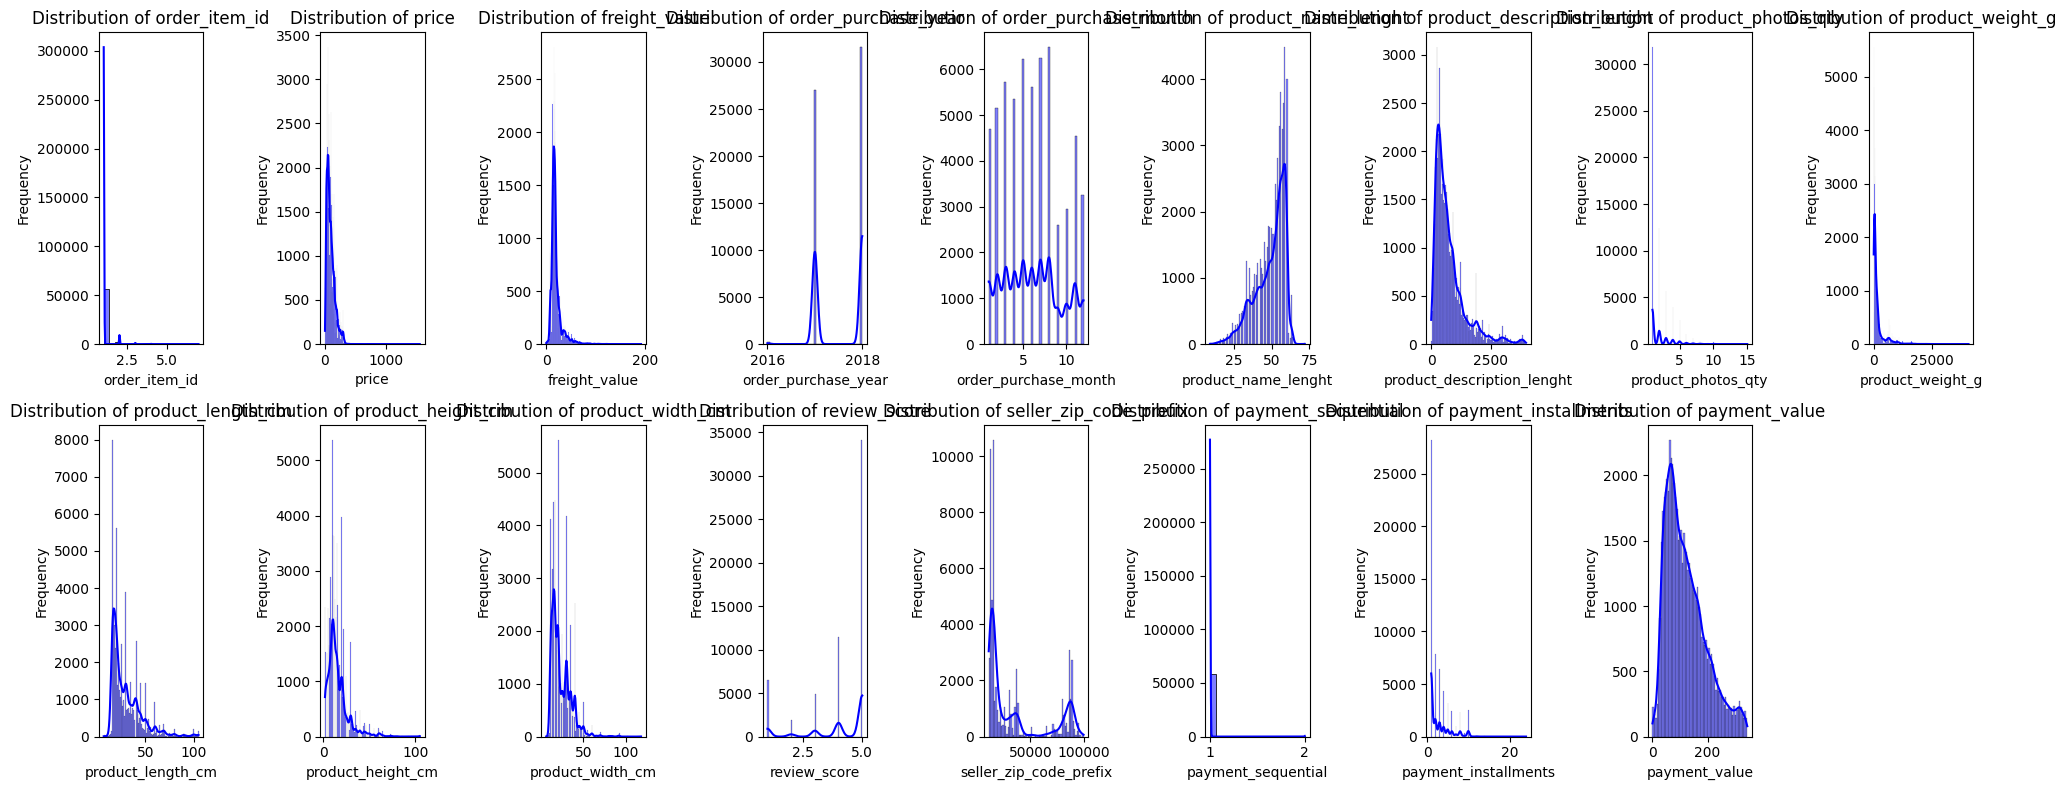

In [10]:
num_features = ecoms_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 8))
for i, column in enumerate(num_features, 1):
    plt.subplot(2, (len(num_features) + 1) // 2, i)
    sns.histplot(ecoms_df[column], kde=True, color="blue")
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

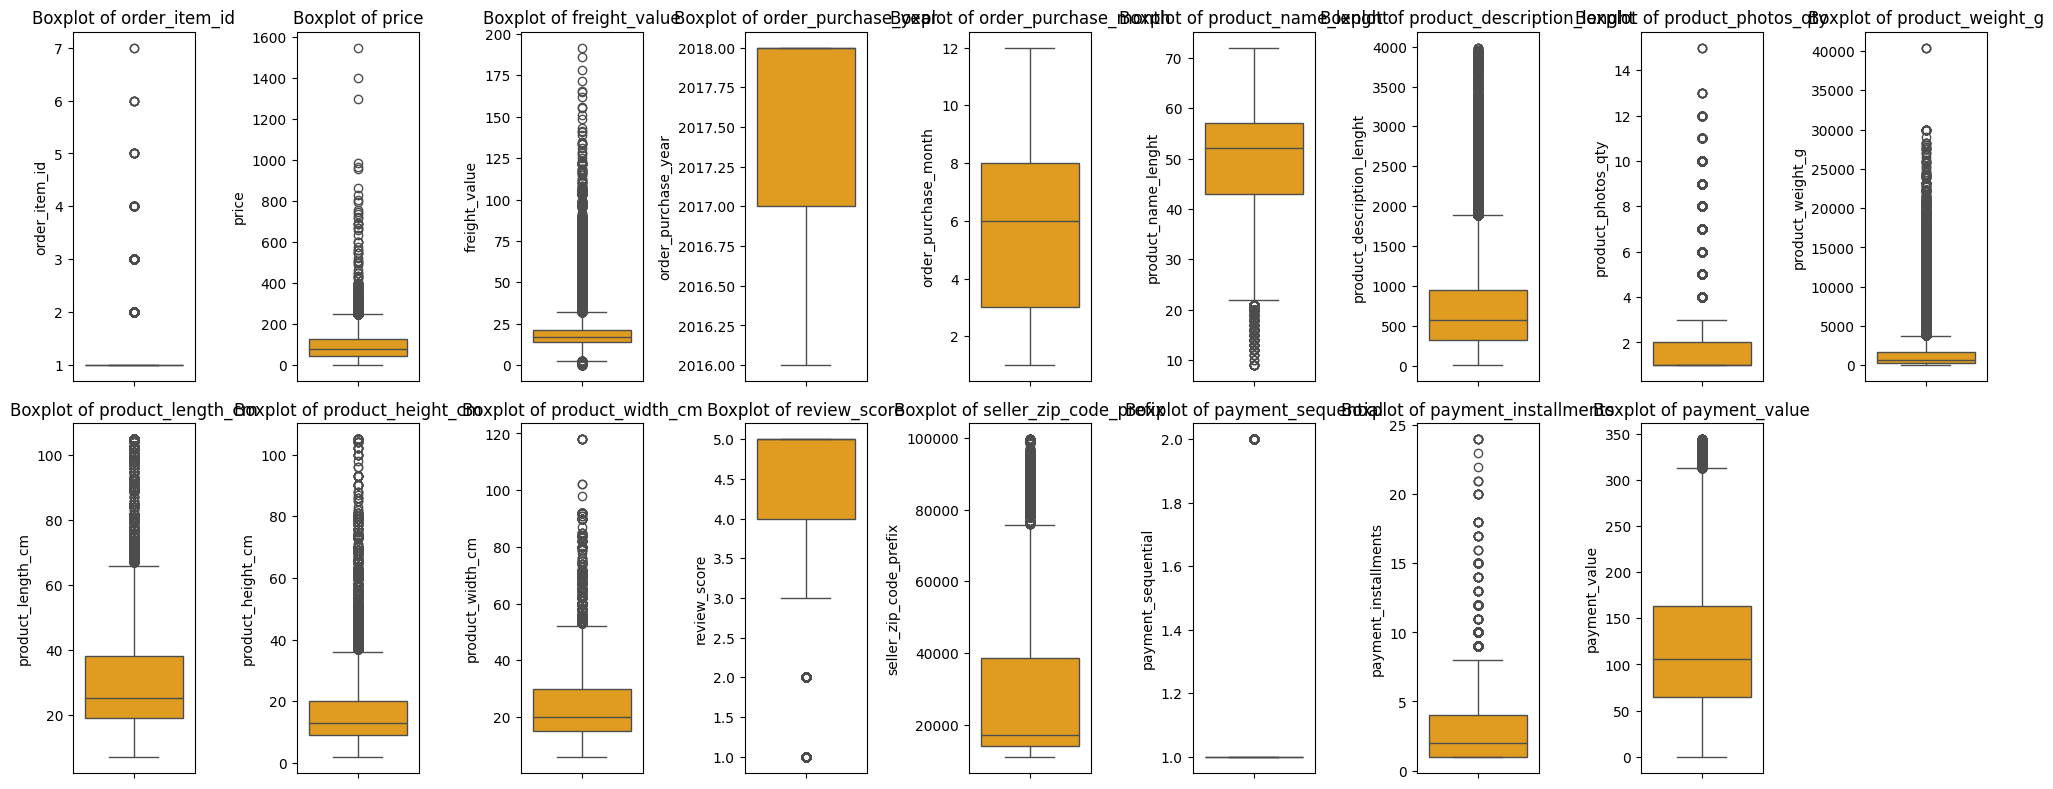

In [11]:
plt.figure(figsize=(20, 8))
for i, column in enumerate(num_features, 1):
    plt.subplot(2, (len(num_features) + 1) // 2, i)
    sns.boxplot(data=ecoms_df, y=column, color="orange")
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

Lumayan cukup banyak untuk outliernya, untuk kedepannya akan memilih data yang cocok, dan juga menerapkan berbagai teknik penanganan data agar data terdistribusi rata.

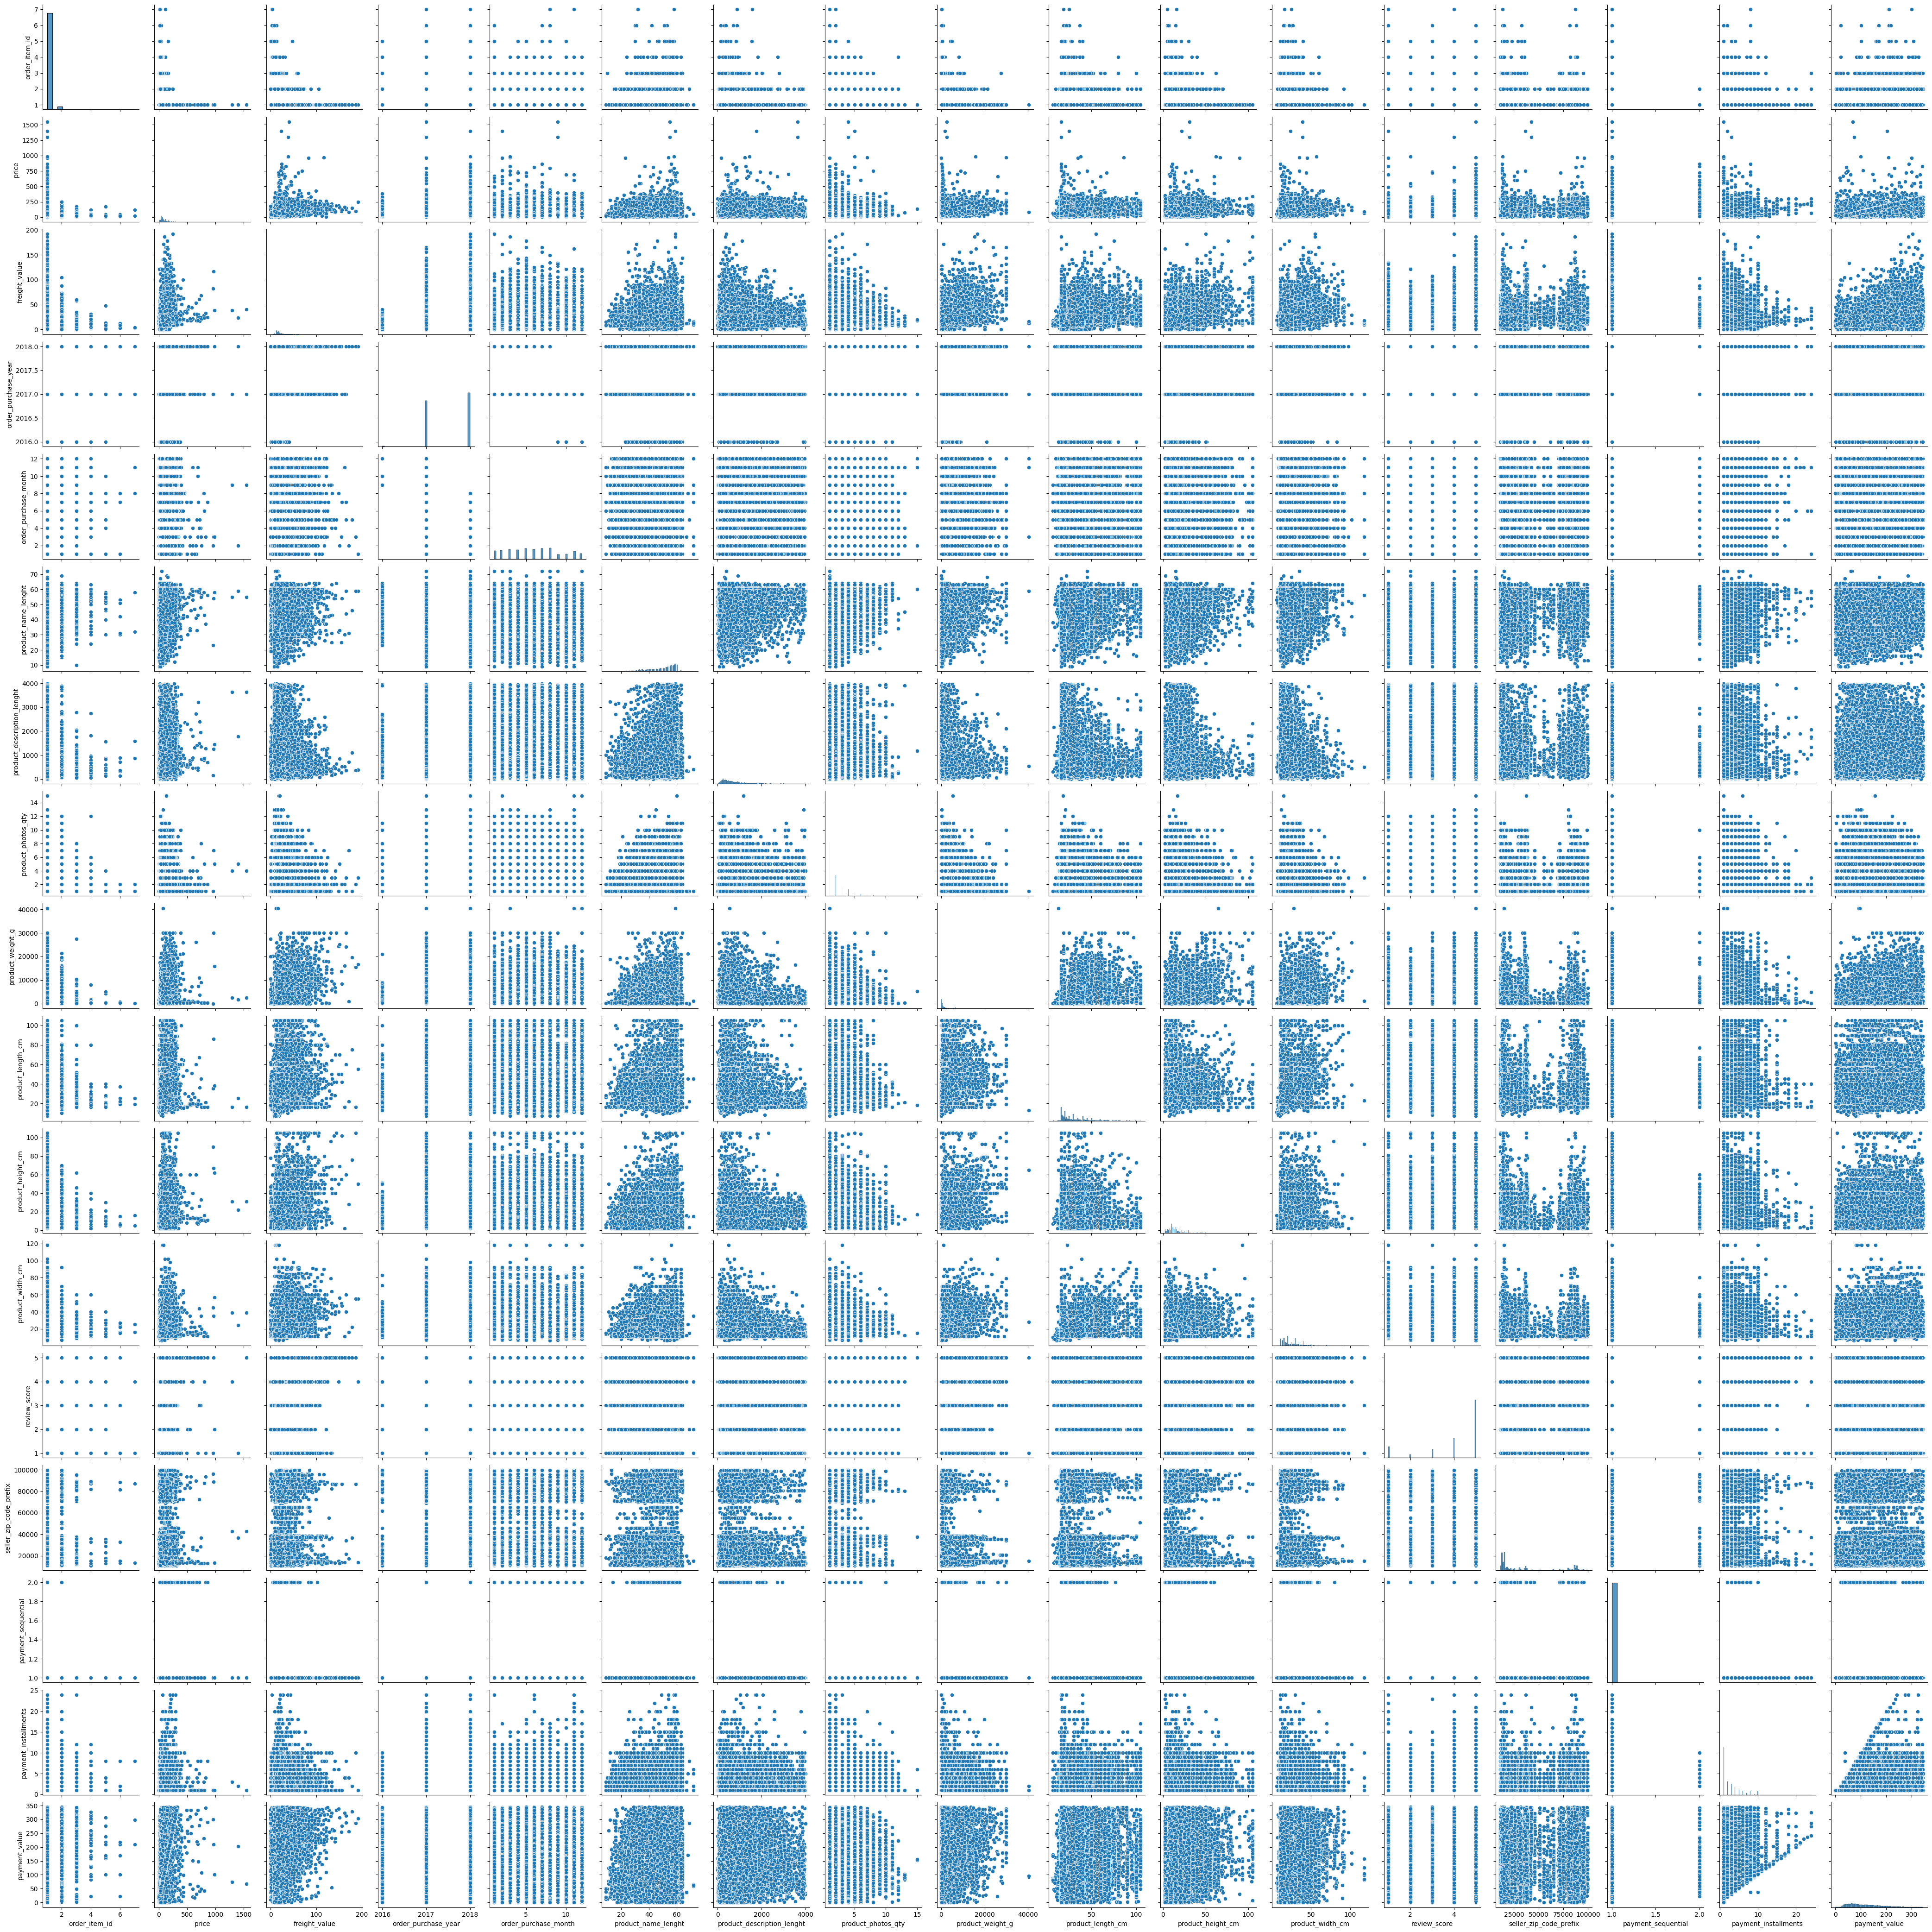

In [12]:
sns.pairplot(ecoms_df[num_features])
plt.show()

## 4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

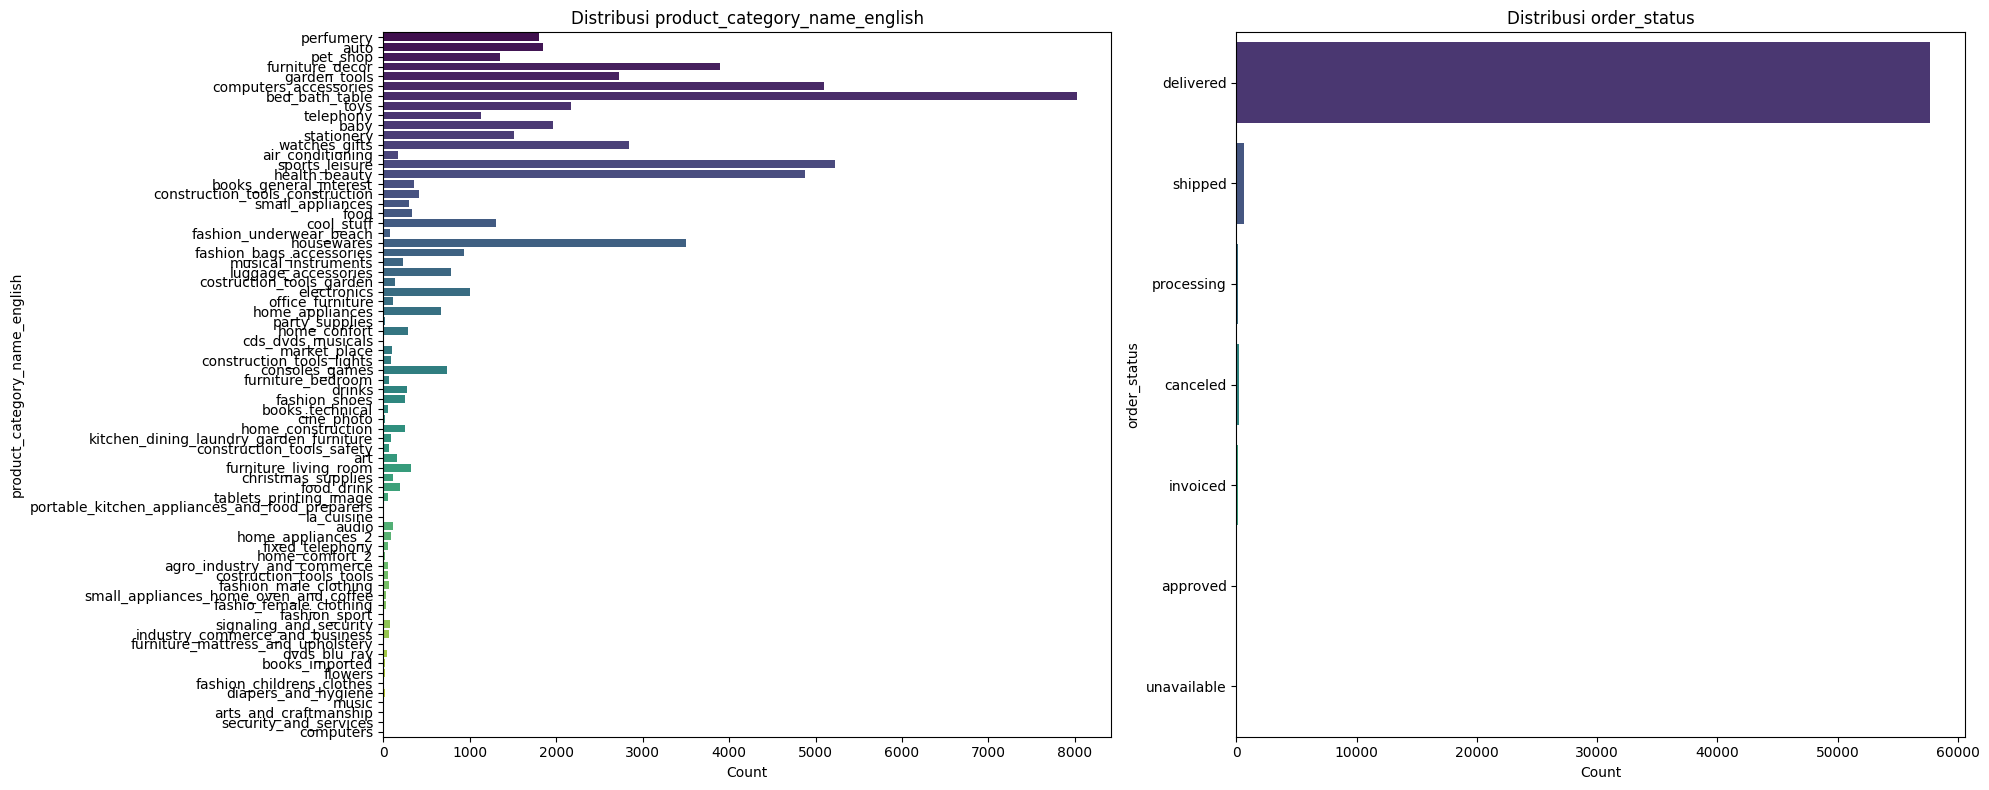

In [13]:
cat_features = ecoms_df[['product_category_name_english', 'order_status']].columns
plt.figure(figsize=(20, 8))
for i, column in enumerate(cat_features, 1):
    plt.subplot(1, len(cat_features), i)
    sns.countplot(y=ecoms_df[column], hue=ecoms_df[column], palette='viridis', legend=False,  dodge=False,)
    plt.title(f'Distribusi {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


Untuk bagian ini, visualisasi kolom bertipe kategorikal (object) hanya dilakukan pada kolom **product_category_name_english dan order_status.** Hal ini dikarenakan kolom seperti **order_id, product_id, review_id, customer_id, dan order_purchase_date** akan memakan waktu yang cukup lama untuk divisualisasikan.

## 5. **Merapihkan dan Membuat Variasi Fitur Baru Pada Data**  

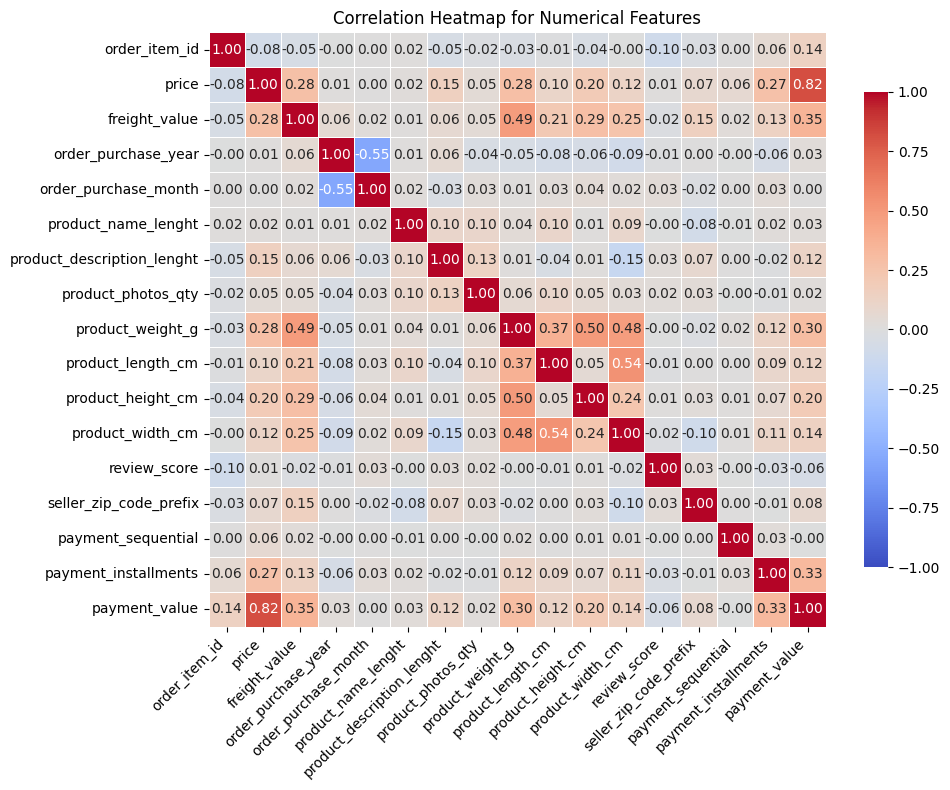

In [14]:
plt.figure(figsize=(10, 8))
correlation_matrix = ecoms_df[num_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap for Numerical Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Dikarenakan Jumlah Kolom/Fitur data lumayan banyak dan juga ada bebrapa kolom/fitur yang tidak sesuai, maka keputusan terbaik akan dilakukan pemilihan kolom/fitur yang relavan dan sesuai dengan tujuan analisis ini

dan juga menghapus beberapa kolom/fitur yang tidak relavan

In [15]:
ecoms_df.drop(columns=[
    'seller_id','order_approved_at', 'order_delivered_carrier_date',
    'shipping_limit_date', 'product_category_name',
    'seller_zip_code_prefix', 'seller_city', 'seller_state',
    'review_creation_date','review_answer_timestamp',
    'payment_type', 'payment_value'
], inplace=True)

In [16]:
ecoms_df.head()

order_id                       customer_id  \
0  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
1  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
2  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
3  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
4  76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   

  order_status order_purchase_timestamp order_delivered_customer_date  \
0    delivered      2018-07-24 20:41:37       2018-08-07 15:27:45.000   
1    delivered      2018-08-08 08:38:49       2018-08-17 18:06:29.000   
2    delivered      2017-11-18 19:28:06       2017-12-02 00:28:42.000   
3    delivered      2017-05-16 13:10:30       2017-05-26 12:55:51.000   
4    delivered      2017-01-23 18:29:09       2017-02-02 14:08:10.000   

  order_estimated_delivery_date  order_item_id  \
0           2018-08-13 00:00:00              1   
1           2018-09-04 00:00:00              1   
2           2017-12-15 00:00:00              1   
3           2017-06-07 00:00:00              1   
4           2017-03-06 00:00:00              1   

                         product_id   price  freight_value  ...  \
0  595fac2a385ac33a80bd5114aec74eb8  118.70          22.76  ...   
1  aa4383b373c6aca5d8797843e5594415  159.90          19.22  ...   
2  d0b61bfb1de832b15ba9d266ca96e5b0   45.00          27.20  ...   
3  4520766ec412348b8d4caa5e8a18c464   59.99          15.17  ...   
4  ac1789e492dcd698c5c10b97a671243a   19.90          16.05  ...   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 1.0             400.0               19.0               13.0   
1                 1.0             420.0               24.0               19.0   
2                 3.0             450.0               30.0               10.0   
3                 1.0              50.0               16.0               16.0   
4                 2.0             300.0               35.0               35.0   

   product_width_cm                         review_id  review_score  \
0              19.0  8d5266042046a06655c8db133d120ba5             4   
1              21.0  e73b67b67587f7644d5bd1a52deb1b01             5   
2              20.0  359d03e676b3c069f62cadba8dd3f6e8             5   
3              17.0  07d67dd06ed5f88bef11ef6b464e79ae             5   
4              15.0  fc4af8aea8ec3f1a3cd181d3d0cadbd5             1   

   payment_sequential  payment_installments product_category_name_english  
0                   1                     1                     perfumery  
1                   1                     3                          auto  
2                   1                     1                      pet_shop  
3                   1                     3                          auto  
4                   1                     1               furniture_decor  

[5 rows x 24 columns]

Agar analisis lebih bervariasi dan bisa menjadi wawasan untuk bisnis juga, maka **perlu dilakukan penambahan dan penyesuain fitur yang relavan** agar hasil lebih akurat dan bisa memberikan perporma terbaik dan masukan bisnis yang relavan

### 1. Mengubah kolom tanggal menjadi tipe datetime.

In [17]:
ecoms_df['order_purchase_timestamp'] = pd.to_datetime(ecoms_df['order_purchase_timestamp'])
ecoms_df['order_delivered_customer_date'] = pd.to_datetime(ecoms_df['order_delivered_customer_date'])
ecoms_df['order_estimated_delivery_date'] = pd.to_datetime(ecoms_df['order_estimated_delivery_date'])

In [18]:
ecoms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58836 entries, 0 to 58835
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       58836 non-null  object        
 1   customer_id                    58836 non-null  object        
 2   order_status                   58836 non-null  object        
 3   order_purchase_timestamp       58836 non-null  datetime64[ns]
 4   order_delivered_customer_date  58836 non-null  datetime64[ns]
 5   order_estimated_delivery_date  58836 non-null  datetime64[ns]
 6   order_item_id                  58836 non-null  int64         
 7   product_id                     58836 non-null  object        
 8   price                          58836 non-null  float64       
 9   freight_value                  58836 non-null  float64       
 10  order_purchase_year            58836 non-null  int64         
 11  order_purchase_

### 2. Menambahkan kolom bulan dan tahun transaksi

In [19]:
ecoms_df['order_purchase_month'] = ecoms_df['order_purchase_timestamp'].dt.month
ecoms_df['order_purchase_year'] = ecoms_df['order_purchase_timestamp'].dt.year
ecoms_df['order_purchase_date'] = ecoms_df['order_purchase_year'].astype(str) + '-' + ecoms_df['order_purchase_month'].astype(str).str.zfill(2)

### 3.Menghitung durasi pengiriman (dalam hari)

In [20]:
ecoms_df['shipping_duration_days'] = (
    ecoms_df['order_delivered_customer_date'] - ecoms_df['order_purchase_timestamp']
).dt.days

### 4. Menghitung akurasi pengiriman (lebih cepat atau lambat dari estimasi)

In [21]:
ecoms_df['delivery_accuracy_days'] = (
    ecoms_df['order_estimated_delivery_date'] - ecoms_df['order_delivered_customer_date']
).dt.days

### 5. Menghitung Jumlah Status Pembayaran Yang Sudah

In [22]:
ecoms_df['payment_made'] = (
    ecoms_df['payment_installments'] - ecoms_df['payment_sequential']
).apply(lambda x: 1 if x == 0 else 0)

### 6. Menghitung kombinasi dimensi berat produk.

In [23]:
ecoms_df['product_volume_cm3'] = (
    (ecoms_df['product_length_cm'] * ecoms_df['product_height_cm'] * ecoms_df['product_width_cm']) / ecoms_df['product_weight_g']
)

### 7. Menghitung Kombinasi Keterangan Produk

In [24]:
ecoms_df['product_complexity'] = (
    ecoms_df['product_name_lenght'] + ecoms_df['product_description_lenght'] + ecoms_df['product_photos_qty']
)

### 8. Menampilkan hasil untuk memverifikasi

In [25]:
ecoms_df[['order_purchase_date', 'shipping_duration_days', 'delivery_accuracy_days', 'payment_made', 'product_volume_cm3', 'product_complexity']].head()

order_purchase_date  shipping_duration_days  delivery_accuracy_days  \
0             2018-07                      13                       5   
1             2018-08                       9                      17   
2             2017-11                      13                      12   
3             2017-05                       9                      11   
4             2017-01                       9                      31   

   payment_made  product_volume_cm3  product_complexity  
0             1           11.732500               208.0  
1             0           22.800000               279.0  
2             1           13.333333               530.0  
3             0           87.040000              1016.0  
4             1           61.250000               475.0

### 9. Menghapus kolom yang sudah digabungkan

In [26]:
ecoms_df = ecoms_df.drop(columns=['order_purchase_year','order_purchase_month','order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_weight_g', 'payment_installments', 'payment_sequential', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty'])

In [27]:
ecoms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58836 entries, 0 to 58835
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       58836 non-null  object 
 1   customer_id                    58836 non-null  object 
 2   order_status                   58836 non-null  object 
 3   order_item_id                  58836 non-null  int64  
 4   product_id                     58836 non-null  object 
 5   price                          58836 non-null  float64
 6   freight_value                  58836 non-null  float64
 7   review_id                      58836 non-null  object 
 8   review_score                   58836 non-null  int64  
 9   product_category_name_english  58836 non-null  object 
 10  order_purchase_date            58836 non-null  object 
 11  shipping_duration_days         58836 non-null  int64  
 12  delivery_accuracy_days         58836 non-null 

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.



## 1. Menghapus atau Menangani Data Kosong (Missing Values)


In [28]:
ecoms_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_item_id                    0
product_id                       0
price                            0
freight_value                    0
review_id                        0
review_score                     0
product_category_name_english    0
order_purchase_date              0
shipping_duration_days           0
delivery_accuracy_days           0
payment_made                     0
product_volume_cm3               0
product_complexity               0
dtype: int64

Bisa diambil kesimpulan dataset awal aman dari nilai kosong.

## 2. Menghapus Data Duplikat

In [29]:
print("Jumlah duplikasi: ", ecoms_df.duplicated().sum())

Jumlah duplikasi:  71


In [30]:
ecoms_df[ecoms_df.duplicated(keep=False)]

order_id                       customer_id  \
175    1d251ab94983c4adb11e4b168abb1439  230ab395e91b2421bd00ea45b60b23cb   
176    1d251ab94983c4adb11e4b168abb1439  230ab395e91b2421bd00ea45b60b23cb   
1175   7dc27189eb855013011423a5dcac71c3  848a418025af5ffbbadfdedd85081da7   
1176   7dc27189eb855013011423a5dcac71c3  848a418025af5ffbbadfdedd85081da7   
1650   05e6501cdfbd86fe9a3a788c3d411091  a0262fcf5f286681fc96c8d2b8396208   
...                                 ...                               ...   
56890  498c950b1765883c2a104b8dd227ea90  bd1f61fc15cc21dca7ca5f6786ab475b   
57090  1094dc9e3237f4deff27a2bab683a300  bb06fef1b4fca6bcc757a3db68a9daf1   
57091  1094dc9e3237f4deff27a2bab683a300  bb06fef1b4fca6bcc757a3db68a9daf1   
57307  a3a38cd51c4d299f206bc73c6daaf2b9  7d68e1861e0a36c2876e702fec92adf0   
57308  a3a38cd51c4d299f206bc73c6daaf2b9  7d68e1861e0a36c2876e702fec92adf0   

      order_status  order_item_id                        product_id  price  \
175      delivered              1  fb92dc4602bd9224e0e267496748afc5  219.0   
176      delivered              1  fb92dc4602bd9224e0e267496748afc5  219.0   
1175     delivered              1  e2de41d7036bd95cd37a7a9f4949024f   29.9   
1176     delivered              1  e2de41d7036bd95cd37a7a9f4949024f   29.9   
1650     delivered              1  ef703385b2707af7f9af3e185679811c   75.0   
...            ...            ...                               ...    ...   
56890    delivered              1  bacf2de8920bbcaf6f005a30d81391d2  319.0   
57090    delivered              1  2bb3e85f2a403543fdb64e266e70c792  329.9   
57091    delivered              1  2bb3e85f2a403543fdb64e266e70c792  329.9   
57307    delivered              1  375478581c97832540b9209722a32058  401.7   
57308    delivered              1  375478581c97832540b9209722a32058  401.7   

       freight_value                         review_id  review_score  \
175            19.41  9ff966b8034d68cdb96a90208a86fd5f             5   
176            19.41  9ff966b8034d68cdb96a90208a86fd5f             5   
1175            7.71  6763593c75e88ef9f7205ea179d52ad5             4   
1176            7.71  6763593c75e88ef9f7205ea179d52ad5             4   
1650           13.55  fd4792196a1dd7bb52384ccc54dc8c5e             5   
...              ...                               ...           ...   
56890          11.36  8562724d338c820320d5dc3d5dec9a2e             5   
57090          87.93  ff31a3324f81c1d435eead45f1026320             2   
57091          87.93  ff31a3324f81c1d435eead45f1026320             2   
57307          50.89  5a94a1d981cc8b2e353237182e6ed060             5   
57308          50.89  5a94a1d981cc8b2e353237182e6ed060             5   

         product_category_name_english order_purchase_date  \
175                      watches_gifts             2018-03   
176                      watches_gifts             2018-03   
1175   construction_tools_construction             2018-04   
1176   construction_tools_construction             2018-04   
1650                    bed_bath_table             2017-10   
...                                ...                 ...   
56890                        perfumery             2018-06   
57090                             toys             2017-11   
57091                             toys             2017-11   
57307                             baby             2018-08   
57308                             baby             2018-08   

       shipping_duration_days  delivery_accuracy_days  payment_made  \
175                         8                      11             0   
176                         8                      11             0   
1175                        2                       9             0   
1176                        2                       9             0   
1650                        3                      12             0   
...                       ...                     ...           ...   
56890                       5                       7         

Keputusan terbaik adalah **menghapus data duplikasi identik sepenuhnya,** mengingat bahwa duplikasi ini muncul akibat penghapusan kolom sebelumnya. Hal ini memastikan bahwa dataset bersih dan representatif tanpa informasi yang berulang, yang dapat memengaruhi hasil clustering.

In [31]:
ecoms_df.drop_duplicates(inplace=True)

In [32]:
print("Jumlah duplikasi setelah penghapusan:", ecoms_df.duplicated().sum())

Jumlah duplikasi setelah penghapusan: 0


In [33]:
print("Jumlah data setelah penghapusan duplikasi:",ecoms_df.shape)

Jumlah data setelah penghapusan duplikasi: (58765, 16)


In [34]:
ecoms_df.head()

order_id                       customer_id  \
0  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
1  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
2  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
3  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
4  76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   

  order_status  order_item_id                        product_id   price  \
0    delivered              1  595fac2a385ac33a80bd5114aec74eb8  118.70   
1    delivered              1  aa4383b373c6aca5d8797843e5594415  159.90   
2    delivered              1  d0b61bfb1de832b15ba9d266ca96e5b0   45.00   
3    delivered              1  4520766ec412348b8d4caa5e8a18c464   59.99   
4    delivered              1  ac1789e492dcd698c5c10b97a671243a   19.90   

   freight_value                         review_id  review_score  \
0          22.76  8d5266042046a06655c8db133d120ba5             4   
1          19.22  e73b67b67587f7644d5bd1a52deb1b01             5   
2          27.20  359d03e676b3c069f62cadba8dd3f6e8             5   
3          15.17  07d67dd06ed5f88bef11ef6b464e79ae             5   
4          16.05  fc4af8aea8ec3f1a3cd181d3d0cadbd5             1   

  product_category_name_english order_purchase_date  shipping_duration_days  \
0                     perfumery             2018-07                      13   
1                          auto             2018-08                       9   
2                      pet_shop             2017-11                      13   
3                          auto             2017-05                       9   
4               furniture_decor             2017-01                       9   

   delivery_accuracy_days  payment_made  product_volume_cm3  \
0                       5             1           11.732500   
1                      17             0           22.800000   
2                      12             1           13.333333   
3                      11             0           87.040000   
4                      31             1           61.250000   

   product_complexity  
0               208.0  
1               279.0  
2               530.0  
3              1016.0  
4               475.0

## 3. Normalisasi atau Standarisasi Fitur

In [35]:
ecoms_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58765 entries, 0 to 58835
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       58765 non-null  object 
 1   customer_id                    58765 non-null  object 
 2   order_status                   58765 non-null  object 
 3   order_item_id                  58765 non-null  int64  
 4   product_id                     58765 non-null  object 
 5   price                          58765 non-null  float64
 6   freight_value                  58765 non-null  float64
 7   review_id                      58765 non-null  object 
 8   review_score                   58765 non-null  int64  
 9   product_category_name_english  58765 non-null  object 
 10  order_purchase_date            58765 non-null  object 
 11  shipping_duration_days         58765 non-null  int64  
 12  delivery_accuracy_days         58765 non-null  int6

Normalisasi untuk fitur numerik

In [36]:
num_features = ['price', 'freight_value', 'review_score', 'shipping_duration_days', 'product_complexity', 'delivery_accuracy_days', 'payment_made', 'product_volume_cm3']

scaler = MinMaxScaler()
ecoms_df[num_features] = scaler.fit_transform(ecoms_df[num_features])

Pakai Teknik MinMaxScaler, dikarena cocok dengan data set ini yang memiliki banyak fitur dan rentan

In [37]:
ecoms_df.head()

order_id                       customer_id  \
0  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
1  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
2  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
3  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
4  76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   

  order_status  order_item_id                        product_id     price  \
0    delivered              1  595fac2a385ac33a80bd5114aec74eb8  0.076074   
1    delivered              1  aa4383b373c6aca5d8797843e5594415  0.102670   
2    delivered              1  d0b61bfb1de832b15ba9d266ca96e5b0  0.028500   
3    delivered              1  4520766ec412348b8d4caa5e8a18c464  0.038176   
4    delivered              1  ac1789e492dcd698c5c10b97a671243a  0.012297   

   freight_value                         review_id  review_score  \
0       0.118669  8d5266042046a06655c8db133d120ba5          0.75   
1       0.100203  e73b67b67587f7644d5bd1a52deb1b01          1.00   
2       0.141829  359d03e676b3c069f62cadba8dd3f6e8          1.00   
3       0.079078  07d67dd06ed5f88bef11ef6b464e79ae          1.00   
4       0.083668  fc4af8aea8ec3f1a3cd181d3d0cadbd5          0.00   

  product_category_name_english order_purchase_date  shipping_duration_days  \
0                     perfumery             2018-07                0.025243   
1                          auto             2018-08                0.017476   
2                      pet_shop             2017-11                0.025243   
3                          auto             2017-05                0.017476   
4               furniture_decor             2017-01                0.017476   

   delivery_accuracy_days  payment_made  product_volume_cm3  \
0                0.801347           1.0            0.004131   
1                0.821549           0.0            0.008035   
2                0.813131           1.0            0.004695   
3                0.811448           0.0            0.030694   
4                0.845118           1.0            0.021597   

   product_complexity  
0            0.042601  
1            0.060289  
2            0.122820  
3            0.243896  
4            0.109118

## 4. Deteksi dan Penanganan Outlier

In [38]:
def handle_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

In [39]:
ecoms_df = handle_outliers(ecoms_df, num_features)
ecoms_df[num_features].head()

price  freight_value  review_score  shipping_duration_days  \
0  0.076074       0.118669         0.750                0.025243   
1  0.102670       0.100203         1.000                0.017476   
2  0.028500       0.141829         1.000                0.025243   
3  0.038176       0.079078         1.000                0.017476   
4  0.012297       0.083668         0.375                0.017476   

   product_complexity  delivery_accuracy_days  payment_made  \
0            0.042601                0.801347           1.0   
1            0.060289                0.821549           0.0   
2            0.122820                0.813131           1.0   
3            0.243896                0.811448           0.0   
4            0.109118                0.845118           1.0   

   product_volume_cm3  
0            0.004131  
1            0.008035  
2            0.004695  
3            0.010608  
4            0.010608

## 5. Binning (Pengelompokan Data)

Untuk data yang bersifat kategorical agar saat dilabel encoder mudah maka diperlukan binning atau menggabungkan beberapa kolom kategorical ke rentan tertentu, agar rentan data tidak terlalu berjauhan dan juga kedepanya dapat memudahkan model memahami data

In [40]:
print(ecoms_df['order_status'].nunique())

7


In [41]:
print(ecoms_df['order_status'].unique())

['delivered' 'shipped' 'processing' 'canceled' 'invoiced' 'approved'
 'unavailable']


In [42]:
ecoms_df['order_status_encoded'] = ecoms_df['order_status'].replace({
    'done': 'completed',
    'shipped': 'shipped', 'processing': 'shipped',
    'invoiced': 'process', 'approved': 'process',
    'cancel': 'canceled', 'unavailable': 'canceled'
})

In [43]:
print(ecoms_df['order_status_encoded'].unique())

['delivered' 'shipped' 'canceled' 'process']


## 6. Encoding Data Kategorikal

Label Encoding Untuk 'order_status'


In [44]:
label_encoder = LabelEncoder()
ecoms_df['order_status_encoded'] = label_encoder.fit_transform(ecoms_df['order_status_encoded'])

In [45]:
print(ecoms_df['order_status_encoded'].unique())

[1 3 0 2]


In [46]:
ecoms_df.head()

order_id                       customer_id  \
0  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
1  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
2  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
3  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
4  76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   

  order_status  order_item_id                        product_id     price  \
0    delivered              1  595fac2a385ac33a80bd5114aec74eb8  0.076074   
1    delivered              1  aa4383b373c6aca5d8797843e5594415  0.102670   
2    delivered              1  d0b61bfb1de832b15ba9d266ca96e5b0  0.028500   
3    delivered              1  4520766ec412348b8d4caa5e8a18c464  0.038176   
4    delivered              1  ac1789e492dcd698c5c10b97a671243a  0.012297   

   freight_value                         review_id  review_score  \
0       0.118669  8d5266042046a06655c8db133d120ba5         0.750   
1       0.100203  e73b67b67587f7644d5bd1a52deb1b01         1.000   
2       0.141829  359d03e676b3c069f62cadba8dd3f6e8         1.000   
3       0.079078  07d67dd06ed5f88bef11ef6b464e79ae         1.000   
4       0.083668  fc4af8aea8ec3f1a3cd181d3d0cadbd5         0.375   

  product_category_name_english order_purchase_date  shipping_duration_days  \
0                     perfumery             2018-07                0.025243   
1                          auto             2018-08                0.017476   
2                      pet_shop             2017-11                0.025243   
3                          auto             2017-05                0.017476   
4               furniture_decor             2017-01                0.017476   

   delivery_accuracy_days  payment_made  product_volume_cm3  \
0                0.801347           1.0            0.004131   
1                0.821549           0.0            0.008035   
2                0.813131           1.0            0.004695   
3                0.811448           0.0            0.010608   
4                0.845118           1.0            0.010608   

   product_complexity  order_status_encoded  
0            0.042601                     1  
1            0.060289                     1  
2            0.122820                     1  
3            0.243896                     1  
4            0.109118                     1

- Hasil encoding disimpan dalam kolom baru **order_status_encoded.** Untuk Kolom **order_status** tetap dipertahankan dalam dataset untuk interpretasi, visualisasi, atau laporan.

Kolom kategorikal yang telah di-encode (seperti order_status) digabungkan dengan fitur numerik dalam variabel all_features, sehingga keduanya bisa digunakan bersama dalam algoritma K-Means

In [47]:
all_features = num_features + ['order_status_encoded']

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

### **1. Pemilihan Algoritma: K-Means Clustering**

Keputusan untuk menggunakan K-Means Clustering didasarkan pertimbangan berikut:

- K-Means Clustering dipilih karena efisiensinya dalam menangani data numerik seperti harga, ongkos kirim, dan durasi pengiriman.

- Algoritma ini bekerja optimal untuk data dengan cluster berbentuk bulat menggunakan jarak Euclidean.
- Selain itu, K-Means unggul dalam kecepatan dan skalabilitas, sehingga cocok untuk dataset besar.
- Dengan karakteristik ini, K-Means dapat membantu mengidentifikasi pola atau kelompok produk berdasarkan kemiripan atribut.

### **2. Pemilihan Fitur Untuk Dianalisis**

1. **price** (Harga Produk)

2. **freight_value** (Biaya Ongkos Pengiriman)
3. **review_score** (Skor Penilaian Produk)
4. **shipping_duration_days** (Durasi Waktu Pengiriman)
5. **product_complexity** (Informasi Keterangan Produk)
6. **delivery_accuracy_days** (Akurasi Waktu Pengiriman)
7. **payment_made** (Pembayaran Yang Sudah Dilakukan)
8. **product_volume_cm3** (Volume Ukuran Produk)
9. **order_status_encoded** (Status Pengiriman Produk)

In [48]:
ecoms_df[all_features].head()

price  freight_value  review_score  shipping_duration_days  \
0  0.076074       0.118669         0.750                0.025243   
1  0.102670       0.100203         1.000                0.017476   
2  0.028500       0.141829         1.000                0.025243   
3  0.038176       0.079078         1.000                0.017476   
4  0.012297       0.083668         0.375                0.017476   

   product_complexity  delivery_accuracy_days  payment_made  \
0            0.042601                0.801347           1.0   
1            0.060289                0.821549           0.0   
2            0.122820                0.813131           1.0   
3            0.243896                0.811448           0.0   
4            0.109118                0.845118           1.0   

   product_volume_cm3  order_status_encoded  
0            0.004131                     1  
1            0.008035                     1  
2            0.004695                     1  
3            0.010608                     1  
4            0.010608                     1

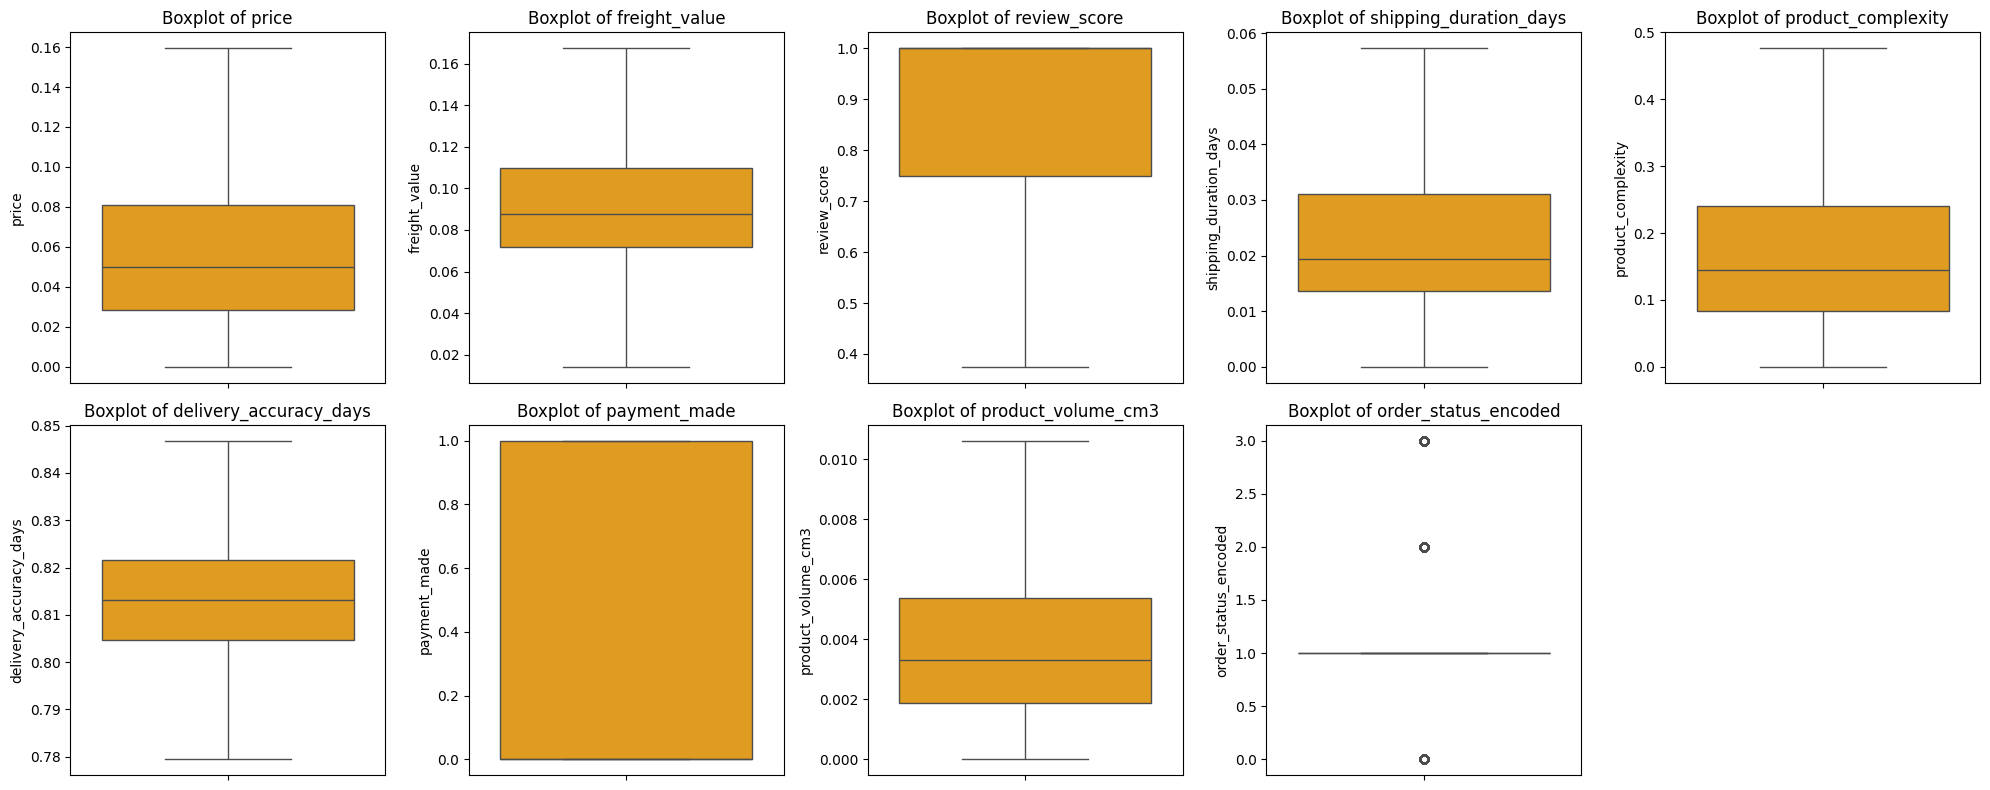

In [49]:
plt.figure(figsize=(20, 8))
for i, column in enumerate(all_features, 1):
    plt.subplot(2, (len(all_features) + 1) // 2, i)
    sns.boxplot(data=ecoms_df, y=column, color="orange")
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

### **3. Latih model dengan data menggunakan algoritma tersebut**

Untuk awal awal disinih dipakai jumlah clusternya 2, agar bisa melihat apakah model ini bisa digunakan, sehabis itu baru dilakukan evaluasi.

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


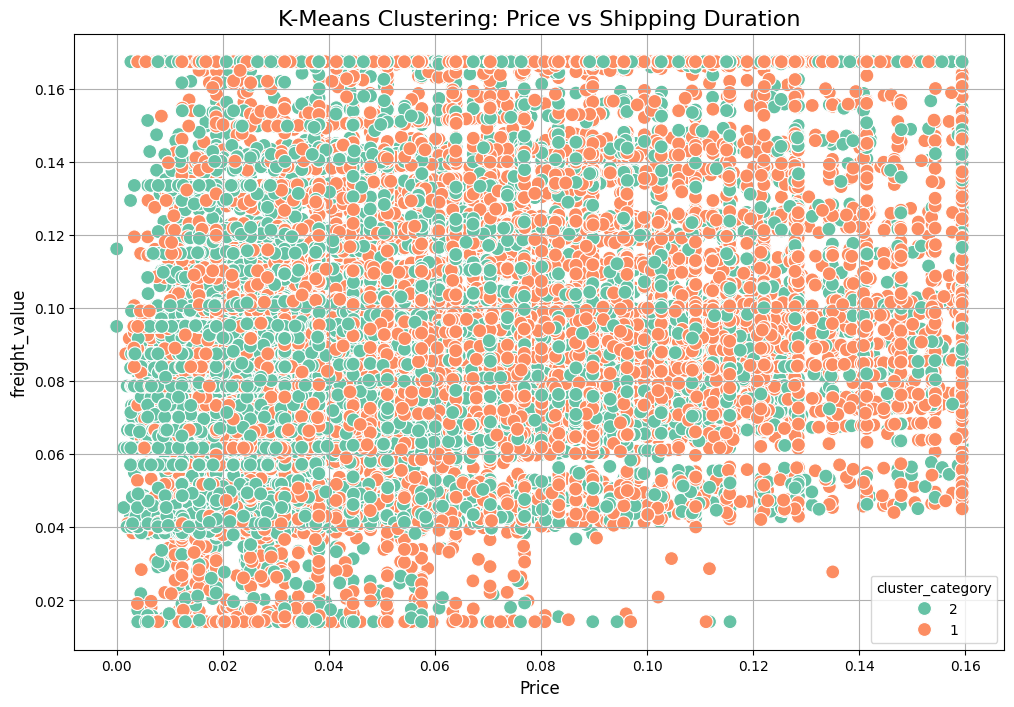

In [50]:
kmeans = KMeans(n_clusters=2, random_state=42)
ecoms_df['cluster_category'] = kmeans.fit_predict(ecoms_df[all_features])
ecoms_df['cluster_category'] = ecoms_df['cluster_category'].map({0: '1', 1: '2'})

plt.figure(figsize=(12, 8))
sns.scatterplot(data=ecoms_df, x='price', y='freight_value', hue='cluster_category', palette='Set2', s=100)
plt.title('K-Means Clustering: Price vs Shipping Duration', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('freight_value', fontsize=12)
plt.legend(title='cluster_category', fontsize=10)
plt.grid(True)
plt.show()

In [51]:
cluster_counts = ecoms_df['cluster_category'].value_counts()
print("Jumlah data di setiap cluster:")
print(cluster_counts)

Jumlah data di setiap cluster:
cluster_category
1    30508
2    28257
Name: count, dtype: int64


Pembagian data juga lumayan hampir rata, tapi perlu dicek cek apakah sudah rata dan berjarak pembagainya, agar hasil fiturnya bisa bervariasi dan bisa dianalisis perbedannya

In [52]:
ecoms_df.head(10)

order_id                       customer_id  \
0  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
1  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
2  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
3  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
4  76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   
5  e6ce16cb79ec1d90b1da9085a6118aeb  494dded5b201313c64ed7f100595b95c   
6  34513ce0c4fab462a55830c0989c7edb  7711cf624183d843aafe81855097bc37   
7  82566a660a982b15fb86e904c8d32918  d3e3b74c766bc6214e0c830b17ee2341   
8  5ff96c15d0b717ac6ad1f3d77225a350  19402a48fe860416adf93348aba37740   
9  432aaf21d85167c2c86ec9448c4e42cc  3df704f53d3f1d4818840b34ec672a9f   

  order_status  order_item_id                        product_id     price  \
0    delivered              1  595fac2a385ac33a80bd5114aec74eb8  0.076074   
1    delivered              1  aa4383b373c6aca5d8797843e5594415  0.102670   
2    delivered              1  d0b61bfb1de832b15ba9d266ca96e5b0  0.028500   
3    delivered              1  4520766ec412348b8d4caa5e8a18c464  0.038176   
4    delivered              1  ac1789e492dcd698c5c10b97a671243a  0.012297   
5    delivered              1  08574b074924071f4e201e151b152b4e  0.063358   
6    delivered              1  f7e0fa615b386bc9a8b9eb52bc1fff76  0.062712   
7    delivered              1  72a97c271b2e429974398f46b93ae530  0.020043   
8    delivered              1  10adb53d8faa890ca7c2f0cbcb68d777  0.012297   
9    delivered              1  72d3bf1d3a790f8874096fcf860e3eff  0.024142   

   freight_value                         review_id  review_score  \
0       0.118669  8d5266042046a06655c8db133d120ba5         0.750   
1       0.100203  e73b67b67587f7644d5bd1a52deb1b01         1.000   
2       0.141829  359d03e676b3c069f62cadba8dd3f6e8         1.000   
3       0.079078  07d67dd06ed5f88bef11ef6b464e79ae         1.000   
4       0.083668  fc4af8aea8ec3f1a3cd181d3d0cadbd5         0.375   
5       0.159199  15898b543726a832d4137fbef5d1d00e         0.375   
6       0.084085  a932e1fddc0c17fc26de56687b48f922         0.750   
7       0.095039  ed220e853e96b629118a3576e02900b6         1.000   
8       0.066715  346e42116863ea64d51cef464d8f0c9c         1.000   
9       0.083981  8f39f09c22b1ceb6e3eb178d8e50bb8a         0.750   

  product_category_name_english order_purchase_date  shipping_duration_days  \
0                     perfumery             2018-07                0.025243   
1                          auto             2018-08                0.017476   
2                      pet_shop             2017-11                0.025243   
3                          auto             2017-05                0.017476   
4               furniture_decor             2017-01                0.017476   
5                  garden_tools             2017-05                0.023301   
6         computers_accessories             2017-07                0.009709   
7                     perfumery             2018-06                0.023301   
8                bed_bath_table             2018-07                0.007767   
9                          toys             2018-03                0.021359   

   delivery_accuracy_days  payment_made  product_volume_cm3  \
0                0.801347           1.0            0.004131   
1                0.821549           0.0            0.008035   
2                0.813131           1.0            0.004695   
3                0.811448           0.0            0.010608   
4                0.845118           1.0            0.010608   
5                0.806397           1.0            0.000763   
6                0.824916           1.0            0.010044   
7                0.840067           1.0            0.003404   
8                0.806397           0.0            0.004507   
9                0.806397           1.0            0.005075   

   product_complexity  order_status_encoded cluster_category  

## **b. Evaluasi Model Clustering**

### 1. Gunakan Elbow Method untuk menentukan jumlah cluster optimal.

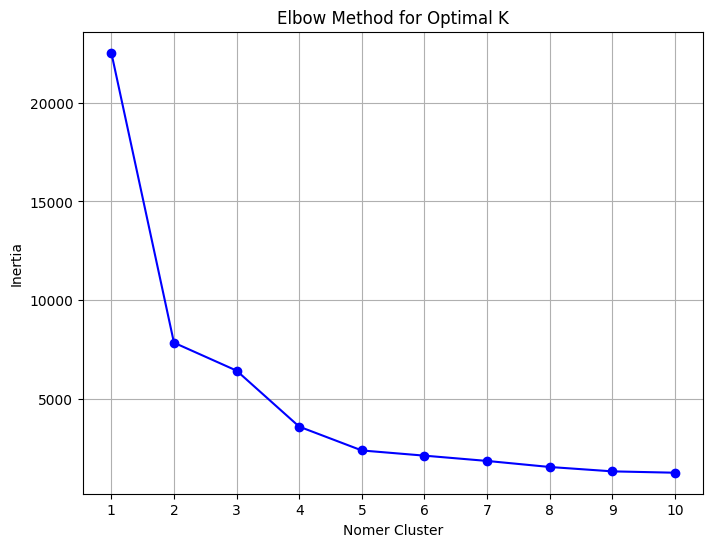

Jumlah cluster yang direkomendasikan berdasarkan Metode Elbow adalah: 2


In [53]:
inertia_values = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(ecoms_df[all_features])
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Nomer Cluster')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

inertia_diff = np.diff(inertia_values)
optimal_k = np.argmin(inertia_diff) + 2

print(f"Jumlah cluster yang direkomendasikan berdasarkan Metode Elbow adalah: {optimal_k}")

### 2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [54]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(ecoms_df[all_features])
    score = silhouette_score(ecoms_df[all_features], cluster_labels)
    silhouette_scores.append((k, score))

for k, score in silhouette_scores:
    print(f'k={k}, Silhouette Score={score:.3f}')

k=2, Silhouette Score=0.663
k=3, Silhouette Score=0.559
k=4, Silhouette Score=0.592
k=5, Silhouette Score=0.548
k=6, Silhouette Score=0.521
k=7, Silhouette Score=0.461
k=8, Silhouette Score=0.464
k=9, Silhouette Score=0.487
k=10, Silhouette Score=0.490


Optimal k berdasarkan Silhouette Score: 2


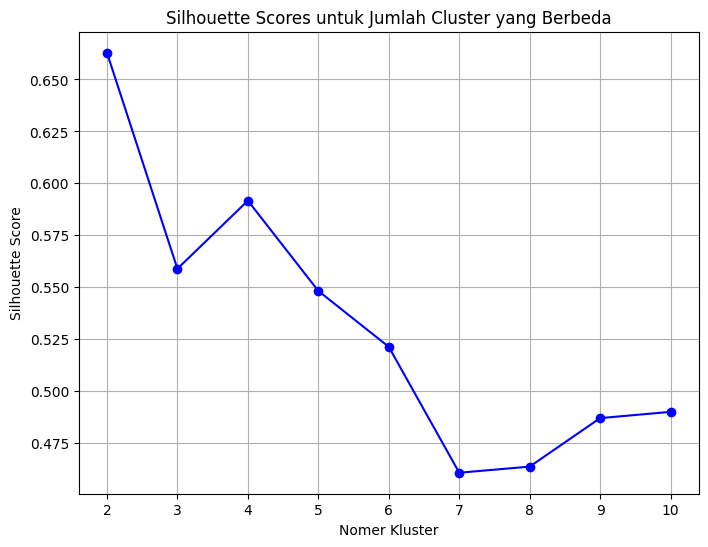

In [55]:
optimal_k = max(silhouette_scores, key=lambda x: x[1])[0]
print(f'Optimal k berdasarkan Silhouette Score: {optimal_k}')

plt.figure(figsize=(8, 6))
plt.plot([k for k, _ in silhouette_scores], [score for _, score in silhouette_scores], marker='o', color='b')
plt.title('Silhouette Scores untuk Jumlah Cluster yang Berbeda')
plt.xlabel('Nomer Kluster')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

### 3. Penetuan Kluster Optimal

Berdasarkan informasi dari gambar diatas dapat disimpulakan bahwa:

* Jumlah cluster yang direkomendasikan berdasarkan Metode Elbow adalah: 2

* Hasil dari tertinggi dari Silhouette Score diperoleh : k=2, Silhouette Score=0.663


Berarti pengunaan k = 2 sudah sesuai dan lumayan sedikit bervariasi dan berjarak pemisahan antara clusternya.

## **c. Feature Selection (Opsional)**

Walapaun pemisahan antara cluster mendapatkan score pemisahan yang lumayan optimal, tetapi agar memaksimalkan pemisahan jarak anatra fitur dalam cluster diputuskan kembali akan dievaluasi ulang kemabali dnegan melakukan teknik feature selection, agar pemisahan semakin bagus antar clusternya.

Maka akan diterapkan beberapa pilihan teknik/metode mulai dari analisis fitur secara manual dengan melihat hasil heatmap dan juga menggunakan teknik PCA

### 1. Korelasi fitur dengan Heatmap

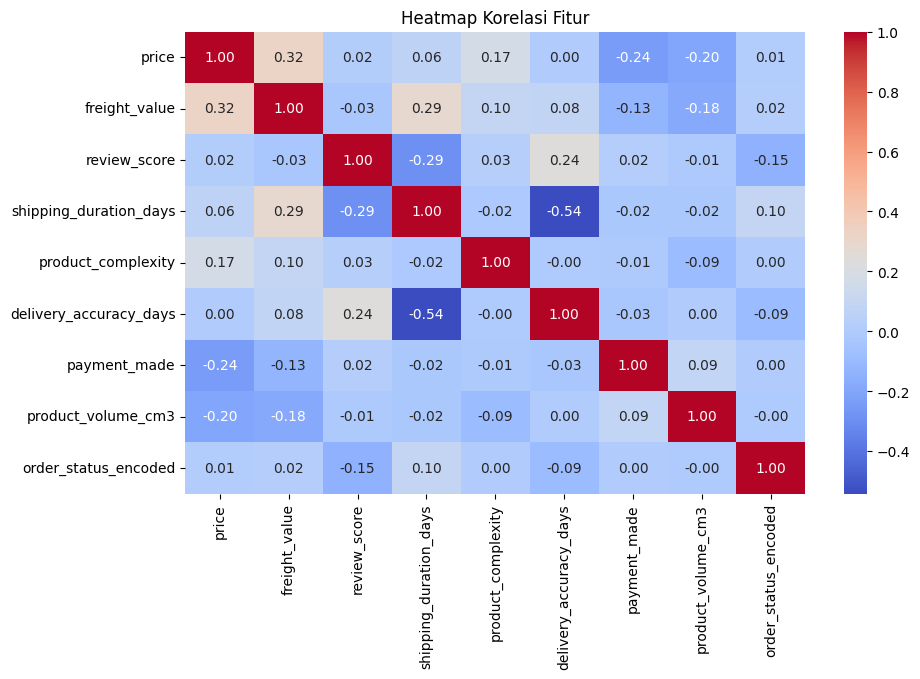

In [56]:
plt.figure(figsize=(10, 6))
sns.heatmap(ecoms_df[all_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Fitur")
plt.show()

Berdasarkan dari hasil korelasi heatmap fitur-fitur yang di lihat semuanya hampir optimal dan baik untuk dianalisis.

### 2. Menerapkan teknik Principal Component Analysis (PCA)

In [57]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(ecoms_df[all_features])
explained_variance = pca.explained_variance_ratio_

num_pca_features = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"Jumlah Komponen Optimal: {num_pca_features}")

Jumlah Komponen Optimal: 4


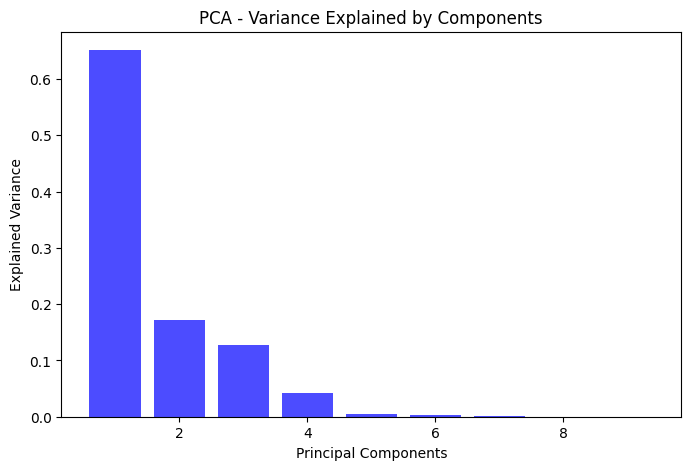

In [58]:
plt.figure(figsize=(8,5))
plt.bar(range(1, len(all_features) + 1), explained_variance, alpha=0.7, color='b', label='Individual Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('PCA - Variance Explained by Components')
plt.show()

In [59]:
pca = PCA(n_components=num_pca_features)
X_pca_final = pca.fit_transform(ecoms_df[all_features])

feature_importance = np.abs(pca.components_).sum(axis=0)
sorted_indices = np.argsort(feature_importance)[::-1]
effective_features_pca = np.array(all_features)[sorted_indices[:num_pca_features]]
print("Fitur terbaik berdasarkan PCA:", effective_features_pca)

Fitur terbaik berdasarkan PCA: ['review_score' 'order_status_encoded' 'product_complexity' 'payment_made']


### 3. Menggunakan fitur hasil seleksi, untuk mengoptimalkan pembagian dan pemisahan antar cluster

In [60]:
selected_features = ['review_score', 'order_status_encoded', 'product_complexity', 'payment_made', 'freight_value','price', 'shipping_duration_days']

Ditambahkan beberapa fitur relevan selain rekomendasi PCA, yaitu Freight Value, Shipping Duration Days, dan Price, berdasarkan heatmap korelasi dan kesesuaiannya dengan tujuan analisis.

**1. Freight Value**
Berkorelasi positif dengan price (0.32), menunjukkan bahwa produk mahal cenderung memiliki ongkos kirim tinggi. Secara bisnis, ini membantu strategi harga dan optimasi logistik.

**2. Shipping Duration Days**
Korelasi negatif dengan review_score (-0.29) menunjukkan bahwa pengiriman lebih lama cenderung mendapat ulasan buruk. Fitur ini penting untuk mengelompokkan produk berdasarkan performa pengiriman.

**3. Price**
Faktor utama dalam segmentasi, membedakan produk berdasarkan kelas harga. Dari sisi bisnis, mendukung strategi pemasaran dan analisis daya beli pelanggan.

**Evaluasi Silhoutte Score kembali**

In [61]:
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(ecoms_df[selected_features])

k_values = range(2, 11)
sil_scores = []
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pca_data)
    sil_score = silhouette_score(pca_data, labels)
    sil_scores.append(sil_score)
    inertia_values.append(kmeans.inertia_)
    print(f"K={k}, Silhouette Score={sil_score:.3f}")

K=2, Silhouette Score=0.676
K=3, Silhouette Score=0.700
K=4, Silhouette Score=0.655
K=5, Silhouette Score=0.619
K=6, Silhouette Score=0.574
K=7, Silhouette Score=0.517
K=8, Silhouette Score=0.557
K=9, Silhouette Score=0.562
K=10, Silhouette Score=0.603


## **d. Visualisasi Hasil Clustering**

### 1. Visualisasi Hasil Clustering Dari Hasil Fitur Yang Sudah Dievaluasi.

Berdasarkan evaluasi feature_selection dan feature_engginer disarakan menggunkan jumlah kluster optimal adalah K=3, Silhouette Score=0.700, dengan tingkat akurasi pemisahan jarak antar cluster yang cukup optimal dan berjarak

In [62]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
ecoms_df['cluster_category'] = kmeans.fit_predict(ecoms_df[selected_features])
pca_transformed = pca.fit_transform(ecoms_df[selected_features])

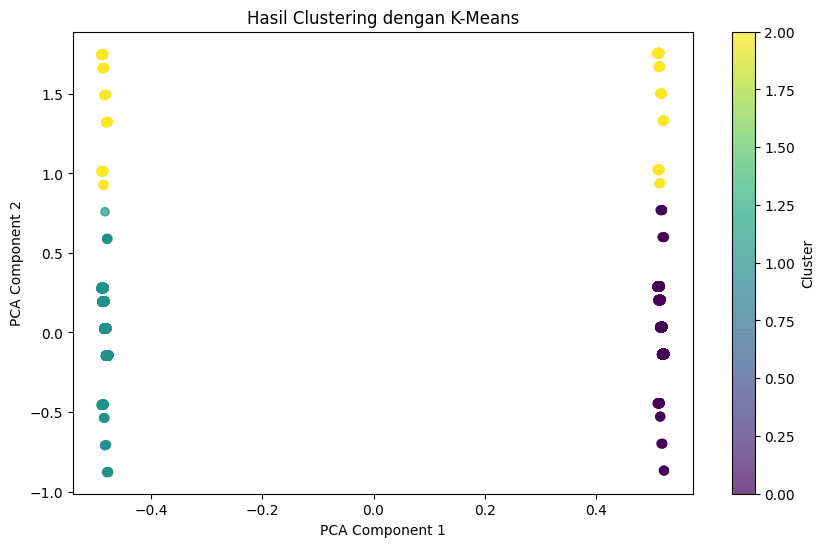

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=ecoms_df['cluster_category'], cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Hasil Clustering dengan K-Means')
plt.colorbar(label='Cluster')
plt.show()

### 2. Jumlah Data Tiap Kluster.

In [64]:
cluster_counts = ecoms_df['cluster_category'].value_counts()
print("Jumlah data di setiap cluster:")
print(cluster_counts)

Jumlah data di setiap cluster:
cluster_category
1    30037
0    27824
2      904
Name: count, dtype: int64


In [65]:
ecoms_df.head()

order_id                       customer_id  \
0  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
1  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
2  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
3  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
4  76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   

  order_status  order_item_id                        product_id     price  \
0    delivered              1  595fac2a385ac33a80bd5114aec74eb8  0.076074   
1    delivered              1  aa4383b373c6aca5d8797843e5594415  0.102670   
2    delivered              1  d0b61bfb1de832b15ba9d266ca96e5b0  0.028500   
3    delivered              1  4520766ec412348b8d4caa5e8a18c464  0.038176   
4    delivered              1  ac1789e492dcd698c5c10b97a671243a  0.012297   

   freight_value                         review_id  review_score  \
0       0.118669  8d5266042046a06655c8db133d120ba5         0.750   
1       0.100203  e73b67b67587f7644d5bd1a52deb1b01         1.000   
2       0.141829  359d03e676b3c069f62cadba8dd3f6e8         1.000   
3       0.079078  07d67dd06ed5f88bef11ef6b464e79ae         1.000   
4       0.083668  fc4af8aea8ec3f1a3cd181d3d0cadbd5         0.375   

  product_category_name_english order_purchase_date  shipping_duration_days  \
0                     perfumery             2018-07                0.025243   
1                          auto             2018-08                0.017476   
2                      pet_shop             2017-11                0.025243   
3                          auto             2017-05                0.017476   
4               furniture_decor             2017-01                0.017476   

   delivery_accuracy_days  payment_made  product_volume_cm3  \
0                0.801347           1.0            0.004131   
1                0.821549           0.0            0.008035   
2                0.813131           1.0            0.004695   
3                0.811448           0.0            0.010608   
4                0.845118           1.0            0.010608   

   product_complexity  order_status_encoded  cluster_category  
0            0.042601                     1                 0  
1            0.060289                     1                 1  
2            0.122820                     1                 0  
3            0.243896                     1                 1  
4            0.109118                     1                 0

### 3. visualisasi Grafik Bar Tiap Cluster.

#### 1. Visualisasi Grafik Bar Cluster 1

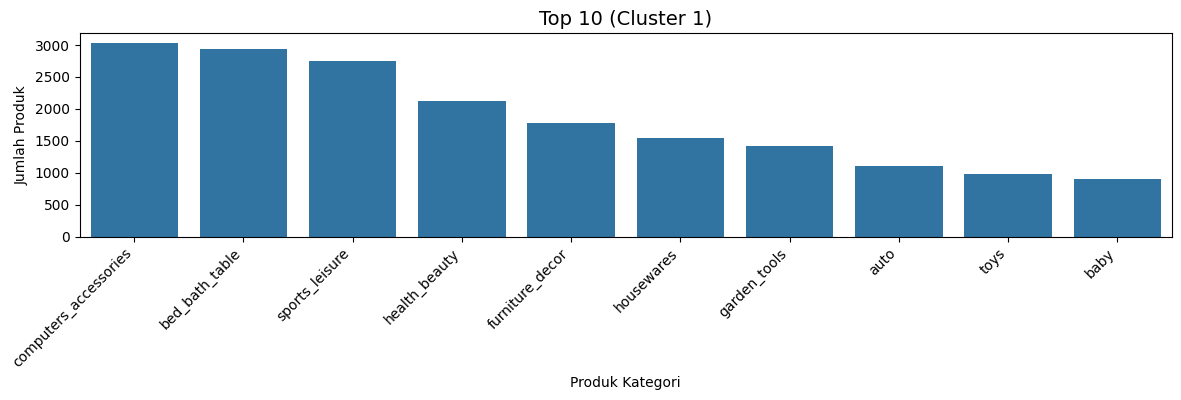

In [66]:
cluster1 = ecoms_df[ecoms_df['cluster_category'] == 0]
top_1 = cluster1['product_category_name_english'].value_counts().head(10)
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
sns.barplot(x=top_1.index, y=top_1.values)
plt.title('Top 10 (Cluster 1)', fontsize=14)
plt.xlabel('Produk Kategori')
plt.ylabel('Jumlah Produk')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### 2. Visualisasi Grafik Bar Cluster 2

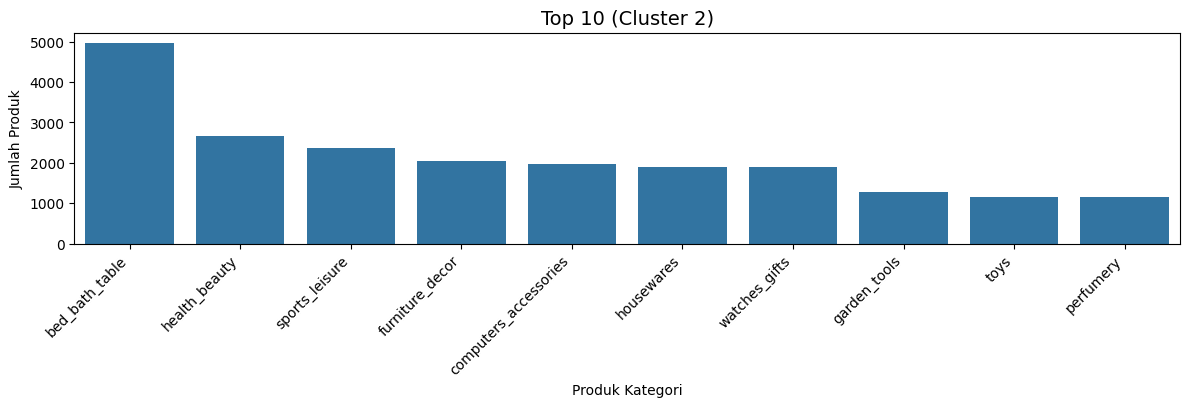

In [67]:
cluster2 = ecoms_df[ecoms_df['cluster_category'] == 1]
top_2 = cluster2['product_category_name_english'].value_counts().head(10)
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 2)
sns.barplot(x=top_2.index, y=top_2.values)
plt.title('Top 10 (Cluster 2)', fontsize=14)
plt.xlabel('Produk Kategori')
plt.ylabel('Jumlah Produk')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### 3. Visualisasi Grafik Bar Cluster 3

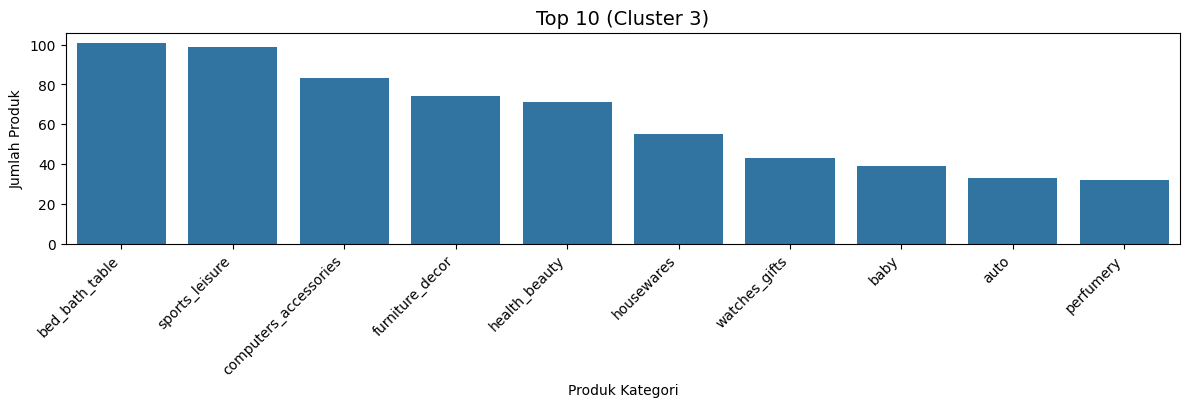

In [68]:
cluster3 = ecoms_df[ecoms_df['cluster_category'] == 2]
top_3 = cluster3['product_category_name_english'].value_counts().head(10)
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 2)
sns.barplot(x=top_3.index, y=top_3.values)
plt.title('Top 10 (Cluster 3)', fontsize=14)
plt.xlabel('Produk Kategori')
plt.ylabel('Jumlah Produk')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Inverse Transform pada feature yang sudah dilakukan Labelisasi

In [69]:
ecoms_df['order_status_encoded'] = label_encoder.inverse_transform(ecoms_df['order_status_encoded'])

In [70]:
print(ecoms_df['order_status_encoded'].unique())

['delivered' 'shipped' 'canceled' 'process']


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

In [71]:
ecoms_df[num_features] = scaler.inverse_transform(ecoms_df[num_features])

In [72]:
ecoms_df.head()

order_id                       customer_id  \
0  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
1  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
2  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
3  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
4  76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   

  order_status  order_item_id                        product_id   price  \
0    delivered              1  595fac2a385ac33a80bd5114aec74eb8  118.70   
1    delivered              1  aa4383b373c6aca5d8797843e5594415  159.90   
2    delivered              1  d0b61bfb1de832b15ba9d266ca96e5b0   45.00   
3    delivered              1  4520766ec412348b8d4caa5e8a18c464   59.99   
4    delivered              1  ac1789e492dcd698c5c10b97a671243a   19.90   

   freight_value                         review_id  review_score  \
0          22.76  8d5266042046a06655c8db133d120ba5           4.0   
1          19.22  e73b67b67587f7644d5bd1a52deb1b01           5.0   
2          27.20  359d03e676b3c069f62cadba8dd3f6e8           5.0   
3          15.17  07d67dd06ed5f88bef11ef6b464e79ae           5.0   
4          16.05  fc4af8aea8ec3f1a3cd181d3d0cadbd5           2.5   

  product_category_name_english order_purchase_date  shipping_duration_days  \
0                     perfumery             2018-07                    13.0   
1                          auto             2018-08                     9.0   
2                      pet_shop             2017-11                    13.0   
3                          auto             2017-05                     9.0   
4               furniture_decor             2017-01                     9.0   

   delivery_accuracy_days  payment_made  product_volume_cm3  \
0                     5.0           1.0           11.732500   
1                    17.0           0.0           22.800000   
2                    12.0           1.0           13.333333   
3                    11.0           0.0           30.095238   
4                    31.0           1.0           30.095238   

   product_complexity order_status_encoded  cluster_category  
0               208.0            delivered                 0  
1               279.0            delivered                 1  
2               530.0            delivered                 0  
3              1016.0            delivered                 1  
4               475.0            delivered                 0

### Analisis Karakteristik Cluster dari Model KMeans

In [73]:
cluster_characteristics = ecoms_df.groupby('cluster_category').agg({
    'review_score' : 'mean',
    'order_status_encoded': lambda x: x.mode()[0],
    'product_complexity' : 'mean',
    'payment_made': lambda x: x.mode()[0],
    'freight_value' : 'mean',
    'price' : 'mean',
    'shipping_duration_days' : 'mean'
})
cluster_characteristics

review_score order_status_encoded  product_complexity  \
cluster_category                                                          
0                     4.327379            delivered          761.495867   
1                     4.285215            delivered          769.372008   
2                     2.859513              shipped          787.082965   

                  payment_made  freight_value       price  \
cluster_category                                            
0                          1.0      17.180443   76.428729   
1                          0.0      18.897996  105.874408   
2                          0.0      18.936753   99.167434   

                  shipping_duration_days  
cluster_category                          
0                              11.731850  
1                              12.022306  
2                              18.196350

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

* Cluster 0 (1) – Produk Mid-Range
  - Rata-rata Review Score: **4.32/5.00**
  - Rata-rata Product Complexity: **761.49**
  - Rata-rata Freight Value: **17.18**
  - Rata-rata Price: **76.43**
  - Rata-rata Shipping Duration: **11 - 12 hari**
  - Order Status Terbanyak: **Delivered**
  - Payment Made Terbanyak: **1** (pembayaran sukses)
  - **Analisis:** Produk dalam cluster ini memiliki ulasan yang cukup tinggi, harga menengah, dan pengiriman relatif cepat. Sebagian besar produk telah dikirim dengan sukses. Produk dalam kategori ini memiliki potensi penjualan yang stabil.

* Cluster 1 (2) – Produk Premium
  - Rata-rata Review Score: **4.28/5.00**
  - Rata-rata Product Complexity: **769.37**
  - Rata-rata Freight Value: **18.89**
  - Rata-rata Price: 105.87**
  - Rata-rata Shipping Duration: **12 hari**
  - Order Status Terbanyak: **Delivered**
  - Payment Made Terbanyak: **0** (pembayaran belum lunas total)
  - **Analisis:** Produk dalam cluster ini memiliki harga yang lebih tinggi dengan kualitas yang masih cukup baik. Namun, ada indikasi pembayaran yang cicilannya belom lunas total. Segmentasi ini bisa ditargetkan untuk konsumen dengan daya beli tinggi, tetapi perlu strategi pembayaran yang lebih fleksibel untuk meningkatkan konversi.


* Cluster 2 (3) – Produk Low-Performance
  - Rata-rata Review Score: **2.86/5.00**
  - Rata-rata Product Complexity: **787.08**
  - Rata-rata Freight Value: **18.93**
  - Rata-rata Price: **99.16**
  - Rata-rata Shipping Duration: **18 hari**
  - Order Status Terbanyak: **Shipped**
  - Payment Made Terbanyak: **0** (pembayaran belum lunas total)
  - **Analisis:** Produk dalam cluster ini memiliki review yang lebih rendah, harga masih cukup tinggi, tetapi waktu pengiriman jauh lebih lama. Sebagian besar pesanan belum sampai ke pelanggan (status shipped). Perlu perhatian pada efisiensi logistik dan kualitas produk agar lebih kompetitif dan meningkatkan kepuasan pelanggan.

# **7. Mengeksport Data**

Hasil Akhir dari tahap Clustering, data set disimpan Pada file hasil_clustering.csv yang kedepannya digunakan untuk memprediksi produk mana yang unggul kedepannya.

In [74]:
ecoms_df.to_csv('hasil_clustering.csv', index=False)
print("Data berhasil disimpan dalam file hasil_clustering.csv")

Data berhasil disimpan dalam file hasil_clustering.csv
